# Using Different Data Sets

### 311 Service Requests in NYC
NYC311 can provide you access to non-emergency City services and information about City government programs. NYC311 can help with a broad range of services, including things like homeless person assistance, pothole repair, or help understanding a property tax bill.

**The goal of this exercise is the count the number of noise complaints in New York City by neighborhood.**

In [1]:
# Analysis
import geopandas as gpd
import pandas as pd
from numpy.random import seed
import os
import numpy as np

# Graphics
import matplotlib.pyplot as plt
from matplotlib import colors

import seaborn as sns
from pysal.viz import splot
from splot.esda import plot_moran
import contextily as ctx

sns.set_context(context='paper')

## warnings is a module that allows you to filter warnings
import warnings
## we are going to ignore all warnings (so they won't print)
warnings.filterwarnings("ignore")

In [2]:
path = os.getcwd
os.chdir( '/Users/yujinlee/Documents/Summer 2024/CRP3850/Week2_7')

In [3]:
##For this exercise, we are using Application Programming Interfaces (APIs) to import information. APIs allow softwares to talk to each other. 
##That is why Python can bring in data from the NYC Open Data just with the link

nyc_311_url = "https://data.cityofnewyork.us/resource/erm2-nwe9.json"
nyc_311 = pd.read_json(nyc_311_url)

##show the first five rows of the dataframe
nyc_311.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,incident_zip,intersection_street_1,intersection_street_2,address_type,...,resolution_description,resolution_action_updated_date,landmark,vehicle_type,taxi_pick_up_location,closed_date,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment
0,61417633,2024-06-09T00:59:00.000,DOT,Department of Transportation,Traffic Signal Condition,Controller,11220.0,5 AVENUE,56 STREET,INTERSECTION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,61415460,2024-06-09T00:27:00.000,DOT,Department of Transportation,Traffic Signal Condition,Controller,11210.0,FLATBUSH AVENUE,AVENUE J,INTERSECTION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61416526,2024-06-08T23:38:00.000,DOT,Department of Transportation,Street Light Condition,Flood Light Lamp Out,11219.0,NaN,NaN,ADDRESS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61414360,2024-06-08T23:37:00.000,DOT,Department of Transportation,Street Light Condition,Street Light Out,11226.0,CORTELYOU ROAD,EAST 23 STREET,INTERSECTION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,61413255,2024-06-08T23:16:00.000,DOT,Department of Transportation,Street Light Condition,Street Light Out,10314.0,NaN,NaN,ADDRESS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If you are experiencing difficulty loading the API (because the connection is very unstable), you also have the option of brining in the file as a csv. 
This is the link to the [NYC 311 Complaints](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/about_data)

pd.read_csv('file path'.csv)

In [4]:
##we are interested in looking at the different neighborhoods (i.e. Manhattan, Bronx, Queens... etc.). 
##Identify the column that has that information and show the first five rows of that specific column

nyc_311.columns
nyc_311['park_borough'].head()

0         BROOKLYN
1         BROOKLYN
2         BROOKLYN
3         BROOKLYN
4    STATEN ISLAND
Name: park_borough, dtype: object

In [5]:
## Now that we have identified the neighborhoods, can we find the complaint types and make a separate dataframe with only noise-complaints?

noise_311 = nyc_311.loc[nyc_311['complaint_type'].apply(lambda x: 'Noise -' in x),:]
noise_311.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,incident_zip,intersection_street_1,intersection_street_2,address_type,...,resolution_description,resolution_action_updated_date,landmark,vehicle_type,taxi_pick_up_location,closed_date,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment
17,61416012,2024-06-08T22:51:34.000,EDC,Economic Development Corporation,Noise - Helicopter,Other,10023.0,CENTRAL PARK WEST,COLUMBUS AVENUE,ADDRESS,...,NaN,NaN,WEST 73 STREET,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,61418179,2024-06-08T22:51:30.000,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,11101.0,27 STREET,28 STREET,ADDRESS,...,NaN,2024-06-08T23:13:10.000,39 AVENUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,61417114,2024-06-08T22:51:29.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,10457.0,EAST MOUNT EDEN AVENUE,EAST 173 STREET,ADDRESS,...,NaN,2024-06-09T00:29:08.000,MONROE AVENUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,61414918,2024-06-08T22:51:20.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,11421.0,PARK LANE SOUTH,85 AVENUE,ADDRESS,...,NaN,NaN,96 STREET,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,61411797,2024-06-08T22:51:20.000,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,10468.0,WEST 183 STREET,DEVOE PARK PATH,ADDRESS,...,NaN,2024-06-09T00:58:10.000,UNIVERSITY AVENUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
## we are interested in the number of noise complaints in each neighborhood. Which neighborhood has the most noise complaints?

noise_311.groupby('park_borough')[['complaint_type']].count()


,complaint_type
park_borough,
BRONX,184
BROOKLYN,167
MANHATTAN,141
QUEENS,169
STATEN ISLAND,34


## Week2_6+7 Spatial Data
### GeoDataFrame 
#### The goal of this exercise is to create a map that shows noise complaints per borough in New York City. The map should be color coded based on the borough and have a gradient scale based on the number of noise complaints. 

We are now going to convert the dataframe for all 311 noise complaint cases 

In [7]:
# Try to identify which columns represent geographic data 

In [8]:
noise_311[['x_coordinate_state_plane', 'y_coordinate_state_plane', 'latitude', 'longitude']]

,x_coordinate_state_plane,y_coordinate_state_plane,latitude,longitude
17,990851.0,222428.0,40.777187,-73.976166
18,1002019.0,214086.0,40.754275,-73.935865
19,1010037.0,246441.0,40.843061,-73.906800
20,1025882.0,193550.0,40.697829,-73.849861
21,1010097.0,252954.0,40.860937,-73.906558
...,...,...,...,...
995,986616.0,200041.0,40.715743,-73.991465
996,1036636.0,238674.0,40.821625,-73.810727
997,1003230.0,218030.0,40.765098,-73.931483
998,995160.0,163877.0,40.616474,-73.960703


In [9]:
# define geometry first 

geometry = gpd.points_from_xy(noise_311.longitude,noise_311.latitude)

In [30]:
# Now change the dataframe to a geodataframe

noise_311_geo = gpd.GeoDataFrame(noise_311, 
                   crs="EPSG:3857",
                   geometry = geometry
                  )

<Axes: title={'center': 'Noise Complaints in NYC'}, xlabel='longitude', ylabel='latitude'>

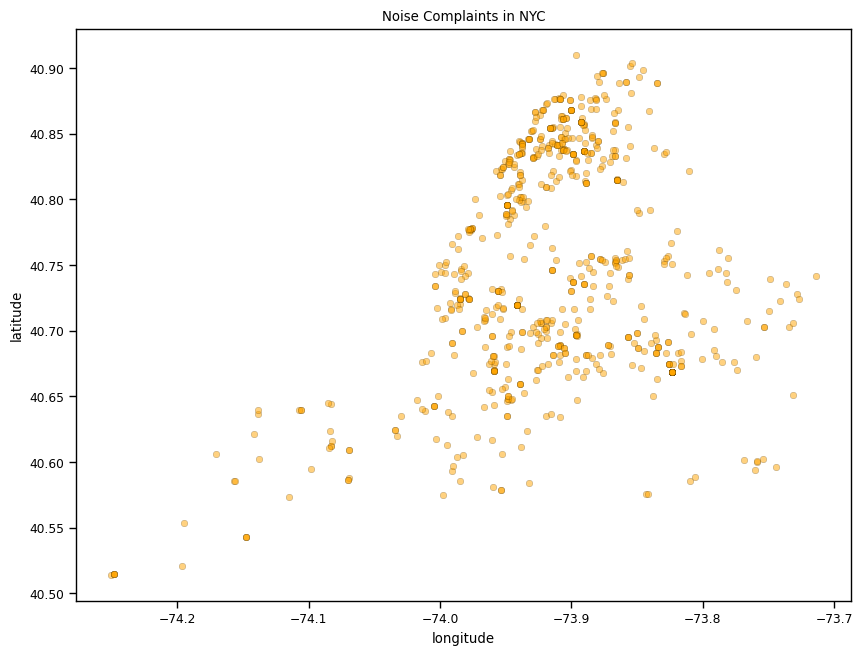

In [11]:
# Now try to plot the incidents of noise complaints on a map just to see what we made
# color of points should be orange, with a transparency of 0.5

fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Noise Complaints in NYC')
plt.xlabel('longitude')
plt.ylabel('latitude')

noise_311_geo.plot( color='orange', alpha = 0.5, edgecolor='black', linewidth = 0.2, ax = ax)

#### This map doesn't have a basemap so let me bring in the basemap from yesterday's class. 

In [12]:
#Bring in the '2020 Census Tracts.zip' from Week2_6 Lecture 

gdf_CT = gpd.read_file('2020 Census Tracts.zip')
gdf_CT = gdf_CT.to_crs(epsg=4326)

<Axes: title={'center': 'Noise Complaints in NYC'}, xlabel='longitude', ylabel='latitude'>

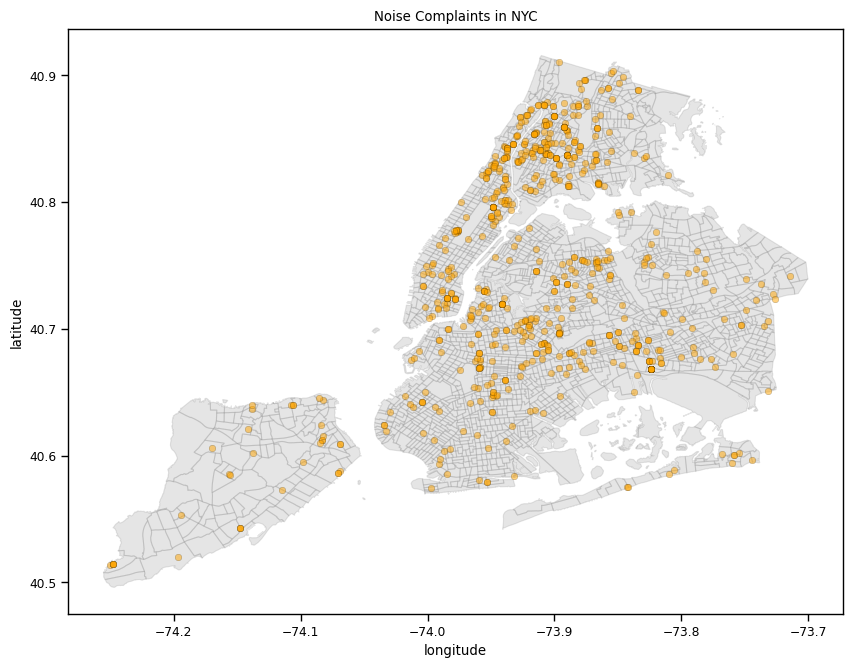

In [13]:
#Now let's plot the points with the basemap and noise complaint points

fig, ax = plt.subplots(figsize=(10,10))

gdf_CT.plot(color ='gray', alpha = 0.2, edgecolor = 'gray', ax=ax)

plt.title('Noise Complaints in NYC')
plt.xlabel('longitude')
plt.ylabel('latitude')

noise_311_geo.plot( color='orange', alpha = 0.5, edgecolor='black', linewidth = 0.2, ax = ax)

#### But what if we wanted to plot noise complaints by borough?

We will now clean the datasets to be able to merge 311 noise complaints with census tract data
1) First, working with census tract data, we will dissolve geometries located within the same borough
2) Next, we will make a separate data set that only includes borough name and count of complaints
3) We will merge the two data sets and then assign it to a geodataframe
4) Lastly, we will plot the data! 

In [14]:
gdf_CT.head()

,ctlabel,borocode,boroname,ct2020,boroct2020,cdeligibil,ntaname,nta2020,cdta2020,cdtaname,geoid,shape_leng,shape_area,geometry
0,1,1,Manhattan,000100,1000100,NaN,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,10833.043929,1.843005e+06,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
1,2.01,1,Manhattan,000201,1000201,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,4754.495247,9.723121e+05,"POLYGON ((-73.98450 40.70951, -73.98655 40.709..."
2,6,1,Manhattan,000600,1000600,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,6976.286215,2.582705e+06,"POLYGON ((-73.99022 40.71440, -73.98934 40.714..."
3,14.01,1,Manhattan,001401,1001401,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001401,5075.332000,1.006117e+06,"POLYGON ((-73.98837 40.71645, -73.98754 40.716..."
4,14.02,1,Manhattan,001402,1001402,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001402,4459.156019,1.226206e+06,"POLYGON ((-73.98507 40.71908, -73.98423 40.718..."


In [15]:
#First, we dissolve the geometry by 'boroname'
nyc_CT = gdf_CT[['boroname', 'geometry']]
nyc_boro = nyc_CT.dissolve(by = 'boroname')
nyc_boro.reset_index()

,boroname,geometry
0,Bronx,"MULTIPOLYGON (((-73.90219 40.80479, -73.90223 ..."
1,Brooklyn,"MULTIPOLYGON (((-74.00198 40.56960, -74.00209 ..."
2,Manhattan,"MULTIPOLYGON (((-74.00843 40.68602, -74.00851 ..."
3,Queens,"MULTIPOLYGON (((-73.90182 40.55679, -73.90204 ..."
4,Staten Island,"MULTIPOLYGON (((-74.22229 40.50257, -74.22234 ..."


In [16]:
### From the question above that asked you to count the number of noise complaints per borough, create a separate data frame with the borough and counts
### name data frame as 'noise_count'
### rename the column from 'complaint_type' to 'complaint_count'

noise_count = noise_311.groupby('park_borough')[['complaint_type']].count()
noise_count.rename(columns={'complaint_type': 'complaint_count'})

,complaint_count
park_borough,
BRONX,184
BROOKLYN,167
MANHATTAN,141
QUEENS,169
STATEN ISLAND,34


In [17]:
### We're going to now merge the number of complains with the nyc_boro geo data 

#after identifying the common name ( which should be boroname), we will conduct a merge on the common column
boro_noise = pd.merge(noise_count, nyc_boro, left_on = "park_borough", right_on = "boroname")
boro_noise.head()

,complaint_type,geometry


#### The merge didn't work. Why didn't it?

In [18]:
### Let's recreate a new dataframe for the noise count

data = {'park_borough' : ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], 'complaint_count' : [103, 119, 145, 93, 11]}
noise_count = pd.DataFrame(data =data)
noise_count

noise_count.sort_values(by= "complaint_count", ascending = False)

,park_borough,complaint_count
2,Manhattan,145
1,Brooklyn,119
0,Bronx,103
3,Queens,93
4,Staten Island,11


In [19]:
### Let's try doing the merge again now

boro_noise = pd.merge(noise_count, nyc_boro, left_on = "park_borough", right_on = "boroname")
boro_noise.head()

,park_borough,complaint_count,geometry
0,Bronx,103,"MULTIPOLYGON (((-73.90219 40.80479, -73.90223 ..."
1,Brooklyn,119,"MULTIPOLYGON (((-74.00198 40.56960, -74.00209 ..."
2,Manhattan,145,"MULTIPOLYGON (((-74.00843 40.68602, -74.00851 ..."
3,Queens,93,"MULTIPOLYGON (((-73.90182 40.55679, -73.90204 ..."
4,Staten Island,11,"MULTIPOLYGON (((-74.22229 40.50257, -74.22234 ..."


In [20]:
### Make boro_noise into a geodataframe 

boro_noise_geo= gpd.GeoDataFrame(boro_noise,
                                 crs = 'EPSG:4326',
                                 geometry= 'geometry'
                                )


Text(80.79166666666667, 0.5, 'latitude')

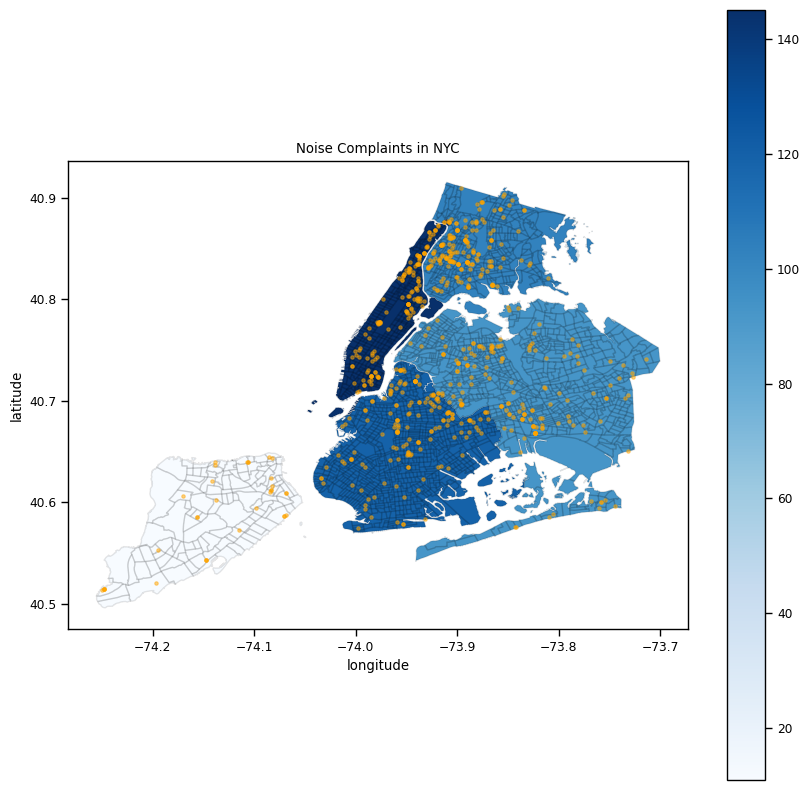

In [21]:
### Now what happens when we try to plot the data?

fig, ax = plt.subplots(figsize = (10,10))

boro_noise_geo.plot(column = 'complaint_count', 
                    legend = True,
                    cmap = 'Blues',
                    ax=ax)

gdf_CT.plot(color ='none', alpha = 0.1, edgecolor = 'black',linewidth = 1, ax=ax)

noise_311_geo.plot(color= 'orange', markersize= 6, alpha =0.5, ax=ax)

plt.title('Noise Complaints in NYC')
plt.xlabel('longitude')
plt.ylabel('latitude')

### Spatial Weights

Now let's try to add spatial weights - Remember that because this data set uses points, we can't use contiguity weights. 

In [22]:
from pysal.lib import weights

In [31]:
# can you try to make KNN=6 weights for noise complaints?
knn6= weights.distance.KNN.from_dataframe(noise_311_geo, k=6)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [33]:
# why are we getting an error? do we have any missing values for longitude and latitude?
## if it is the case that you see missing values, drop those rows with missing spatial data 

noise_311_geo.loc[noise_311_geo['longitude'].isna()==True]

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,incident_zip,intersection_street_1,intersection_street_2,address_type,...,resolution_action_updated_date,landmark,vehicle_type,taxi_pick_up_location,closed_date,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,geometry
111,61418175,2024-06-08T22:44:51.000,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,10469.0,FISH AVENUE,SEYMOUR AVENUE,BLOCKFACE,...,2024-06-09T00:48:48.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY
948,61416621,2024-06-08T21:48:08.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,10025.0,MANHATTAN AVENUE,COLUMBUS AVENUE,BLOCKFACE,...,2024-06-08T21:52:25.000,NaN,NaN,NaN,2024-06-08T21:52:21.000,NaN,NaN,NaN,NaN,POINT EMPTY


In [34]:
noise_311_geo.loc[noise_311_geo['latitude'].isna()==True]

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,incident_zip,intersection_street_1,intersection_street_2,address_type,...,resolution_action_updated_date,landmark,vehicle_type,taxi_pick_up_location,closed_date,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,geometry
111,61418175,2024-06-08T22:44:51.000,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,10469.0,FISH AVENUE,SEYMOUR AVENUE,BLOCKFACE,...,2024-06-09T00:48:48.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY
948,61416621,2024-06-08T21:48:08.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,10025.0,MANHATTAN AVENUE,COLUMBUS AVENUE,BLOCKFACE,...,2024-06-08T21:52:25.000,NaN,NaN,NaN,2024-06-08T21:52:21.000,NaN,NaN,NaN,NaN,POINT EMPTY


In [ ]:
# we can see that there are two rows that have missing values for longitude and latitude. We're going to drop those values 

In [36]:
noise_311_geo.dropna(subset =['longitude', 'latitude'], inplace=True)

In [37]:
noise_311_geo.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,incident_zip,intersection_street_1,intersection_street_2,address_type,...,resolution_action_updated_date,landmark,vehicle_type,taxi_pick_up_location,closed_date,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,geometry
17,61416012,2024-06-08T22:51:34.000,EDC,Economic Development Corporation,Noise - Helicopter,Other,10023.0,CENTRAL PARK WEST,COLUMBUS AVENUE,ADDRESS,...,NaN,WEST 73 STREET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.976 40.777)
18,61418179,2024-06-08T22:51:30.000,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,11101.0,27 STREET,28 STREET,ADDRESS,...,2024-06-08T23:13:10.000,39 AVENUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.936 40.754)
19,61417114,2024-06-08T22:51:29.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,10457.0,EAST MOUNT EDEN AVENUE,EAST 173 STREET,ADDRESS,...,2024-06-09T00:29:08.000,MONROE AVENUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.907 40.843)
20,61414918,2024-06-08T22:51:20.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,11421.0,PARK LANE SOUTH,85 AVENUE,ADDRESS,...,NaN,96 STREET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.850 40.698)
21,61411797,2024-06-08T22:51:20.000,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,10468.0,WEST 183 STREET,DEVOE PARK PATH,ADDRESS,...,2024-06-09T00:58:10.000,UNIVERSITY AVENUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.907 40.861)


In [38]:
# now let's try to make the weights again 
knn6= weights.distance.KNN.from_dataframe(noise_311_geo, k=6)

In [40]:
# make sure to row standardize - do you think there is a big difference whether you row standardize in KNN matrixes? Why or why not?
knn6.transform = "R"

{17: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 30: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 34: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 35: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 37: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 39: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 40: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 41: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 42: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 43: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 44: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 46: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 47: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 49: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 51: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 52: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 

In [45]:
# With the data set that shows noise data, create blockweights

w_bl = weights.util.block_weights(
    noise_311_geo['borough'].values,
    ids= noise_311_geo['unique_key'].values)


In [48]:
# show a matrix of the weights

pd.DataFrame(*w_bl.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,683,684,685,686,687,688,689,690,691,692
61416012,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,1,1,0,0,0,1
61418179,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
61417114,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
61414918,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
61411797,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61415475,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,1,0,0,0,0,1
61416714,0,0,1,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
61415486,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
61410261,0,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0


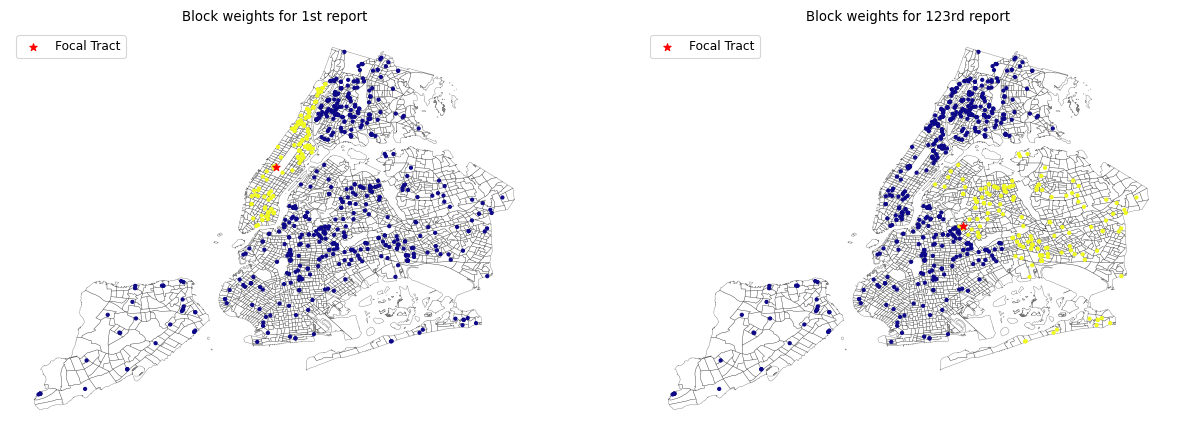

In [63]:
# utilizing the codes from today's class, can you try to create a map that shows the weights for first and 123rd report?
#Adjust any markersize/colorline widt accordingly

# Create full matrix version of weights
full_matrix, ids = w_bl.full()

# Set up figure with two subplots in a row
f, ax = plt.subplots(
    1, 2, figsize=(15, 15),
)

gdf_CT.plot( ax=ax[0], color="white", edgecolor="black", linewidth=0.3, alpha = 0.5)
gdf_CT.plot( ax=ax[1], color="white", edgecolor="black", linewidth=0.3, alpha = 0.5)

# Append weights for 1st polygon and plot on first subplot
noise_311_geo.assign(weight_0=full_matrix[0]).plot(
    "weight_0", cmap="plasma", ax=ax[0], markersize = 5,
)

# Append weights for 123rd polygon and plot on second subplot
noise_311_geo.assign(weight_122=full_matrix[122]).plot(
    "weight_122", cmap="plasma", ax=ax[1], markersize =5
)

# Add centroid of focal tracts
noise_311_geo.iloc[[0], :].centroid.plot(
    ax=ax[0], marker="*", color="red", markersize = 30,label="Focal Tract"
)
noise_311_geo.iloc[[122], :].centroid.plot(
    ax=ax[1], marker="*", color="red", markersize=30, label="Focal Tract"
)

ax[0].set_title("Block weights for 1st report")
ax[1].set_title("Block weights for 123rd report")

# Remove axis
[ax_.set_axis_off() for ax_ in ax]
# Add legend
[ax_.legend(loc="upper left") for ax_ in ax];